In [1]:
### Import the required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore


In [2]:
# reading the CSV file into pandas dataframe
custdata=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/HHE_MA_July31_Batch/main/Cust_Spend_Data.csv")

In [3]:
custdata.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [4]:
custdata.shape

(10, 7)

In [5]:
custdata.dtypes

Cust_ID             int64
Name               object
Avg_Mthly_Spend     int64
No_Of_Visits        int64
Apparel_Items       int64
FnV_Items           int64
Staples_Items       int64
dtype: object

In [6]:
custdata.isnull().sum()

Cust_ID            0
Name               0
Avg_Mthly_Spend    0
No_Of_Visits       0
Apparel_Items      0
FnV_Items          0
Staples_Items      0
dtype: int64

In [7]:
custdataattr=custdata.iloc[:,2:]
custdataattr.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3


In [8]:
custdatascaled=custdataattr.apply(zscore)
custdatascaled.head(10)

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


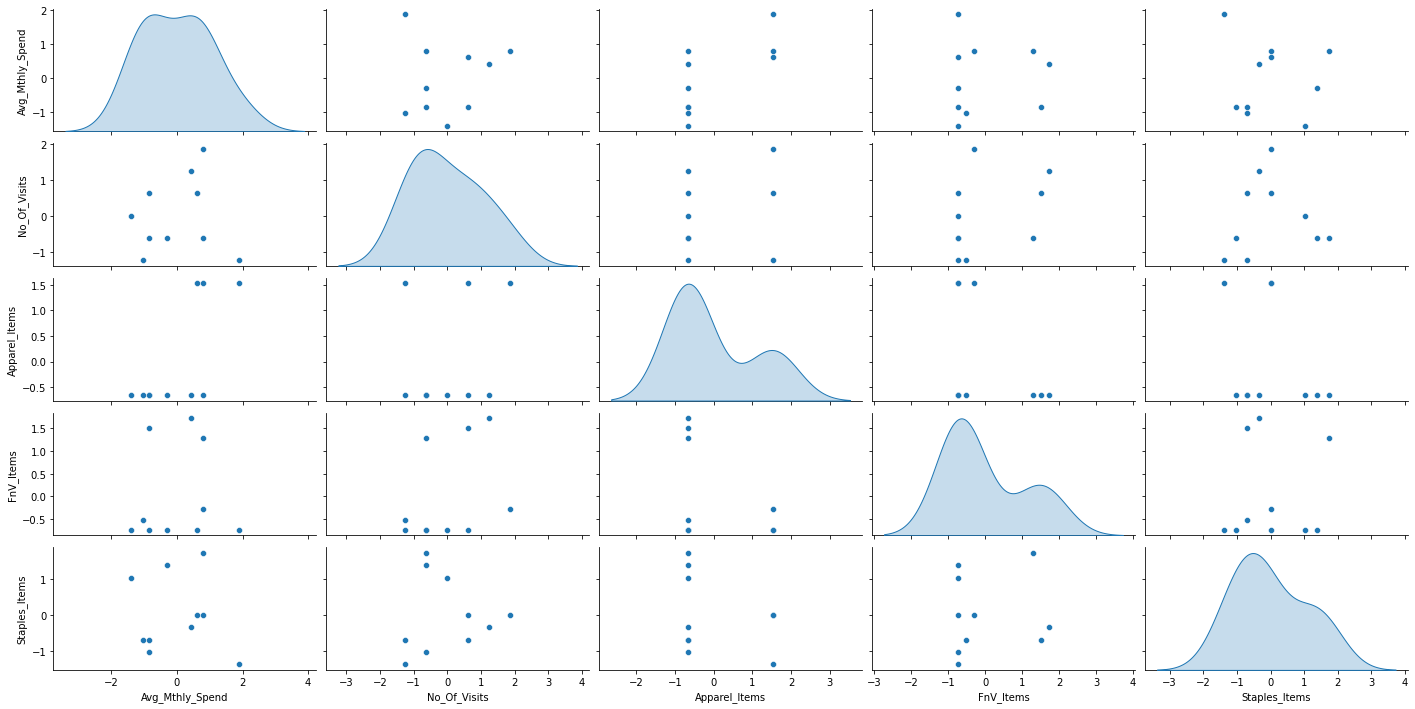

In [9]:
#importing seaborn for statistical plots
sns.pairplot(custdatascaled, height=2,aspect=2,diag_kind='kde')

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
model=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='average')

In [12]:
model.fit(custdatascaled)

AgglomerativeClustering(linkage='average')

In [15]:
custdataattr['labels']=model.labels_
custdataattr.head(10)
# custdataattr.groupby(["labels"]).count()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,10000,2,1,1,0,1
1,7000,3,0,10,9,0
2,7000,7,1,3,4,1
3,6500,5,1,1,4,1
4,6000,6,0,12,3,0
5,4000,3,0,1,8,0
6,2500,5,0,11,2,0
7,2500,3,0,1,1,0
8,2000,2,0,2,2,0
9,1000,4,0,1,7,0


In [17]:
custdataclust=custdataattr.groupby(['labels'])
custdataclust

In [18]:
custdataclust.mean()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
labels,,,,,
0,3571.428571,3.714286,0.0,5.428571,4.571429
1,7833.333333,4.666667,1.0,1.666667,2.666667


In [19]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [20]:
from scipy.spatial.distance import pdist  # pairwise distribution between datapoints

In [22]:
# cophent index is a measure of the correlation between the distance of points in feature space and
# closer it is to  1, the better is clustering
z=linkage(custdatascaled, metric='euclidean', method='average')
c, coph_dists=cophenet(z,pdist(custdatascaled))
c

0.8681149436293064

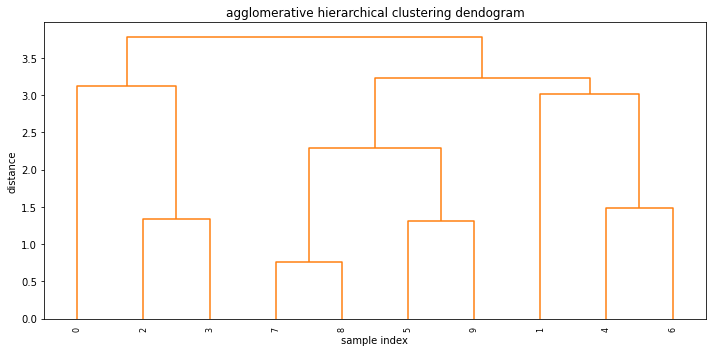

In [24]:
plt.figure(figsize=(10,5))
plt.title('agglomerative hierarchical clustering dendogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(z,leaf_rotation=90, color_threshold=40, leaf_font_size=8)
plt.tight_layout()

In [26]:
# cophent index is a measure of the correlation between the distance of points in feature space and
# closer it is to  1, the better is clustering
z=linkage(custdatascaled, metric='euclidean', method='complete')
c, coph_dists=cophenet(z,pdist(custdatascaled))
c

0.8606955190809153

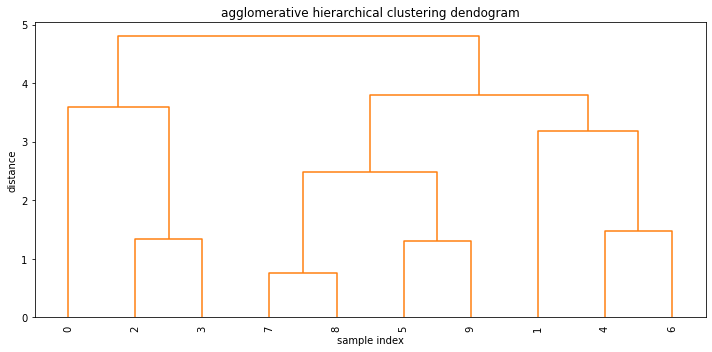

In [29]:
plt.figure(figsize=(10,5))
plt.title('agglomerative hierarchical clustering dendogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(z,leaf_rotation=90, color_threshold=90, leaf_font_size=10)
plt.tight_layout()

In [30]:
# cophent index is a measure of the correlation between the distance of points in feature space and
# closer it is to  1, the better is clustering
z=linkage(custdatascaled, metric='euclidean', method='ward')
c, coph_dists=cophenet(z,pdist(custdatascaled))
c

0.8453818941339526

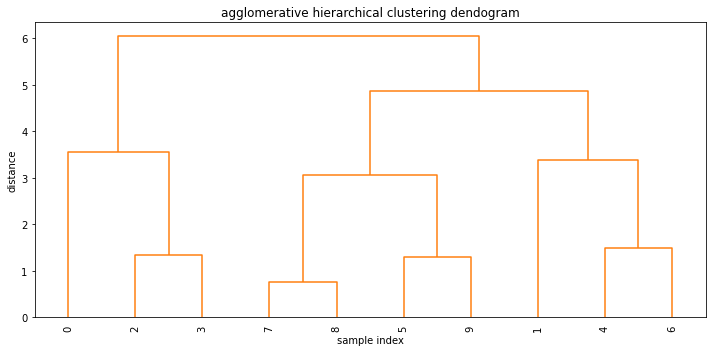

In [31]:
plt.figure(figsize=(10,5))
plt.title('agglomerative hierarchical clustering dendogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(z,leaf_rotation=90, color_threshold=600, leaf_font_size=10)
plt.tight_layout()

### ticket prioritizing of technical issues